# Assignment (Phase 1)

### Group Name : Group 30 

### Full Name: Kaushik Sunil Anagarkar 

### Student number : s3827495

## <span style="color: #0099cc;">Table of Contents
- [Introduction](#1) <br/>
    * [Data Source](#2) <br/>
    * [Dataset Details](#3) <br/>
    * [Dataset Features](#4) <br/>
    * [Target Features](#5) <br/>
- [Goals and Objectives](#6) <br/>
- [Data Cleaning and Preprocessing](#7) <br/>
    * [Descriptive Statistics](#8)<br/>
    * [Removing Constant Features](#9)<br/>
    * [Handling Missing Values](#10) <br/>
    * [Handling Outliers](#11)<br/>
- [Data Exploration and Visualisation](#12)<br/> 
    * [Univariable Visualization](#13)<br/>
    * [Bivariable Visualization](#14)<br/>
    * [Trivariable Visualization](#15)<br/>
- [Summary and Conclusions](#16) <br/>
- [References](#17) <br/>

# <span style="color: #0099cc;"> Introduction <a class="anchor" id="1"></a>

###   <span style="color: #0099cc;"> Data Source <a class="anchor" id="2"></a>

Stroke Prediction Dataset consists of 5110 observations.The dataset is sourced from Kaggle Stroke Prediction Dataset
Stroke Prediction Dataset. (2021). Retrieved 8 April 2021, from https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

###  <span style="color: #0099cc;"> Dataset Details <a class="anchor" id="3"></a>

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.
Stroke Prediction Dataset. (2021). Retrieved 8 April 2021, from https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

###  <span style="color: #0099cc;"> Dataset Features <a class="anchor" id="4"></a>  

The descriptive features are as produced 


|Feature | Datatype | Units | Brief Description |
|-------------|-----------|---------|-----------|
| id  | Nominal Categorical  | NA  | Unique Identifier |
| gender | Nominal Categorical  | NA  |  Gender of the patient("Male", "Female" or "Other") |
| age  | Numerical  | NA  | age of the patient |
| hypertension  | Binary  | NA  | 0 if the patient doesn't have hypertension, 1 if the patient has hypertension |
| heart_disease | Binary  | NA  |  0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease |
| ever_married  | Nominal Categorical | NA | Martial status of the patient( "No" or "Yes") |
| work_type | Nominal Categorical | NA | Work type of the patient( "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" )| 
| residence_type | Nominal Categorical | NA | Residence type of the patient("Rural" or "Urban")
|avg_glucose_level | Numerical |  mg/dl | Average glucose level in blood of the patient
|bmi | Numerical | kg/m2 | BMI of the patient |
| smoking_status | Ordinal Categorical | NA | Smoking status of the patient( "formerly smoked", "never smoked", "smokes" or "Unknown")

* Note: "Unknown" in smoking_status means that the information is unavailable for this patient (Ordinal Categorical)

### <span style="color: #0099cc;"> Target Feature <a class="anchor" id="5"></a>  

The target feature is **stroke** with levels 1 and 0.
    

|Feature | Datatype | Units | Brief Description |
|-------------|-----------|---------|-----------|
| stroke  | Binary | NA  | 1 if the patient had a stroke or 0 if not  |

# <span style="color: #0099cc;"> Goals and Objectives <a class="anchor" id="6"></a> 


The objective of this notebook is to clean the raw data using various data preprocessing techniques since data cleaning is one of the important and fundamental task to remove the errors and accuracies in the datasets which could have lead to inaccuracy in data modeling. After cleaning ,exploring the data to find important insights of the dataset and find any correlations between the features. 

# <span style="color: #0099cc;"> Data Cleaning and Preprocessing <a class="anchor" id="7"></a> 


Import necessary libraries.

In [1]:
#import python libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os 
import warnings
import random

warnings.filterwarnings("ignore")
%matplotlib inline

pd.set_option('display.max_columns', None) 

In [2]:
#Importing the datafile from local device
stroke = pd.read_csv('Data_Group30.csv')
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#display the 10 sampled data observation 
stroke.sample(10,random_state=999)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4358,33924,Female,26.0,0,0,No,Private,Urban,80.94,22.2,smokes,0
4779,65892,Female,58.0,0,0,Yes,Self-employed,Urban,66.71,51.7,never smoked,0
931,54620,Male,40.0,0,0,Yes,Private,Urban,78.11,35.3,never smoked,0
3917,67635,Male,24.0,0,0,No,Private,Urban,90.00,25.5,never smoked,0
1095,954,Male,18.0,0,0,No,Private,Rural,103.94,23.3,never smoked,0
571,721,Female,52.0,1,0,Yes,Self-employed,Urban,114.25,24.3,formerly smoked,0
340,10449,Female,24.0,0,0,Yes,Private,Urban,75.23,29.0,never smoked,0
4488,5170,Male,42.0,0,0,Yes,Govt_job,Rural,67.97,23.8,Unknown,0
4123,32523,Male,68.0,0,1,Yes,Private,Urban,217.74,25.5,Unknown,0
5088,22190,Female,64.0,1,0,Yes,Self-employed,Urban,76.89,30.2,Unknown,0


In [4]:
#shape of stroke dataframe 
stroke.shape

(5110, 12)

In [5]:
#info of the dataset
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
#check the unique values of all features
for i in stroke.columns:
    print("The Unique values of the Column : " , i )
    print(np.unique(stroke[i]))
    print("*********************************************")

The Unique values of the Column :  id
[   67    77    84 ... 72915 72918 72940]
*********************************************
The Unique values of the Column :  gender
['Female' 'Male' 'Other']
*********************************************
The Unique values of the Column :  age
[8.00e-02 1.60e-01 2.40e-01 3.20e-01 4.00e-01 4.80e-01 5.60e-01 6.40e-01
 7.20e-01 8.00e-01 8.80e-01 1.00e+00 1.08e+00 1.16e+00 1.24e+00 1.32e+00
 1.40e+00 1.48e+00 1.56e+00 1.64e+00 1.72e+00 1.80e+00 1.88e+00 2.00e+00
 3.00e+00 4.00e+00 5.00e+00 6.00e+00 7.00e+00 8.00e+00 9.00e+00 1.00e+01
 1.10e+01 1.20e+01 1.30e+01 1.40e+01 1.50e+01 1.60e+01 1.70e+01 1.80e+01
 1.90e+01 2.00e+01 2.10e+01 2.20e+01 2.30e+01 2.40e+01 2.50e+01 2.60e+01
 2.70e+01 2.80e+01 2.90e+01 3.00e+01 3.10e+01 3.20e+01 3.30e+01 3.40e+01
 3.50e+01 3.60e+01 3.70e+01 3.80e+01 3.90e+01 4.00e+01 4.10e+01 4.20e+01
 4.30e+01 4.40e+01 4.50e+01 4.60e+01 4.70e+01 4.80e+01 4.90e+01 5.00e+01
 5.10e+01 5.20e+01 5.30e+01 5.40e+01 5.50e+01 5.60e+01 5.70e+01 

In [7]:
#check the value counts of all features
for i in stroke.columns:
    print("The value counts of the Column : " , i )
    print(stroke[i].value_counts())
    print("*********************************************")

The value counts of the Column :  id
49152    1
21785    1
25982    1
5500     1
28027    1
        ..
45759    1
4795     1
47802    1
49849    1
16380    1
Name: id, Length: 5110, dtype: int64
*********************************************
The value counts of the Column :  gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
*********************************************
The value counts of the Column :  age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
0.48       3
1.40       3
0.16       3
0.08       2
0.40       2
Name: age, Length: 104, dtype: int64
*********************************************
The value counts of the Column :  hypertension
0    4612
1     498
Name: hypertension, dtype: int64
*********************************************
The value counts of the Column :  heart_disease
0    4834
1     276
Name: heart_disease, dtype: int64
*********************************************
The value counts of the Column :  ever_mar

### <span style="color: #0099cc;"> Descriptive Statistics <a class="anchor" id="8"></a> 

In [8]:
#descriptive statistics of the numeric columns
stroke.describe().round(3)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000,5110.000,5110.000,5110.000,5110.000,4909.000,5110.000
mean,36517.829,43.227,0.097,0.054,106.148,28.893,0.049
std,21161.722,22.613,0.297,0.226,45.284,7.854,0.215
min,67.000,0.080,0.000,0.000,55.120,10.300,0.000
25%,17741.250,25.000,0.000,0.000,77.245,23.500,0.000
50%,36932.000,45.000,0.000,0.000,91.885,28.100,0.000
75%,54682.000,61.000,0.000,0.000,114.090,33.100,0.000
max,72940.000,82.000,1.000,1.000,271.740,97.600,1.000


In [9]:
#descriptive statistics of categorical columns 
stroke.describe(include=np.object )

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


###  <span style="color: #0099cc;"> Removing Constant Features <a class="anchor" id="9"></a> 

In [10]:
#removing constant features
stroke=stroke.loc[:,stroke.nunique()!=1]
stroke.shape

(5110, 12)

In [11]:
#Removing Unwanted columns from stroke dataset
stroke=stroke.drop(columns=['id'])
stroke.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### <span style="color: #0099cc;"> Handling Missing Values <a class="anchor" id="10"></a>  

In [12]:
#checking missing values 
stroke.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
#Dropping the missing value in the dataframe 
stroke=stroke.dropna()

In [14]:
#Validating the dropped missing values
stroke.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### <span style="color: #0099cc;">  Handling Outliers <a class="anchor" id="11"></a> 

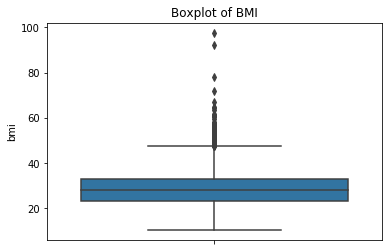

In [15]:
#checking outliers in bmi column
sns.boxplot(y="bmi",data=stroke)
plt.title("Boxplot of BMI")
plt.show()

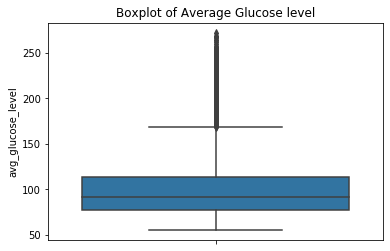

In [16]:
#checking outliers in avg_glucose_level column
sns.boxplot(y="e",data=stroke)
plt.title("Boxplot of Average Glucose level")
plt.show()

In [17]:
#Handling outliers with IQR range method in bmi column 
Q1 = stroke['bmi'].quantile(0.25)
Q3 =stroke['bmi'].quantile(0.75)
IQR =Q3-Q1
print("IQR of the BMI column is :",IQR)

#printing IQR of BMI column in the dataset

IQR of the BMI column is : 9.600000000000001


In [18]:
#Handling outliers with IQR range method in avg_glucose_level column 
Q1_ = stroke['avg_glucose_level'].quantile(0.25)
Q3_ =stroke['avg_glucose_level'].quantile(0.75)
IQR_ =Q3_-Q1_
print("IQR of the Avg glucose level column is:",IQR_)

#printing IQR of Avergae Glucose level column in the dataset

IQR of the Avg glucose level column is: 36.5


In [19]:
#checking outliers in the BMI column
(stroke.bmi < (Q1-1.5*IQR)) | (stroke.bmi > (Q3 + 1.5*IQR))

0       False
2       False
3       False
4       False
5       False
        ...  
5104    False
5106    False
5107    False
5108    False
5109    False
Name: bmi, Length: 4909, dtype: bool

In [20]:
#Removing the outliers in bmi column
stroke = stroke[~((stroke.bmi < (Q1-1.5*IQR)) | (stroke.bmi > (Q3 + 1.5*IQR)))]

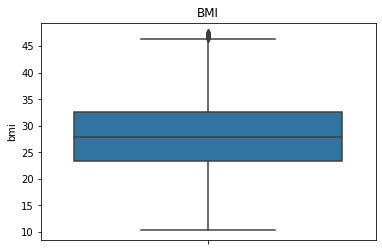

In [21]:
#Validating the removal of outliers 
sns.boxplot(y="bmi",data=stroke)
plt.title("BMI")
plt.show()

In [22]:
#checking outliers in the avg_glucose_level column
(stroke.avg_glucose_level < (Q1_-1.5*IQR_)) | (stroke.avg_glucose_level > (Q3_ + 1.5*IQR_))

0        True
2       False
3        True
4        True
5        True
        ...  
5104    False
5106    False
5107    False
5108    False
5109    False
Name: avg_glucose_level, Length: 4799, dtype: bool

In [23]:
#Removing the outliers in avg_glucose_level column
stroke = stroke[~((stroke.avg_glucose_level < (Q1_-1.5*IQR_)) | (stroke.avg_glucose_level > (Q3_ + 1.5*IQR_)))]

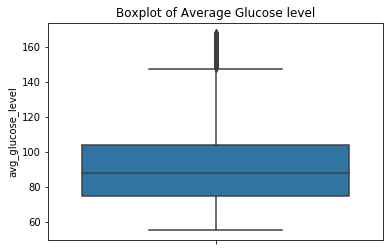

In [24]:
#Validating the removal of outliers 
sns.boxplot(y="avg_glucose_level",data=stroke)
plt.title("Boxplot of Average Glucose level")
plt.show()

# <span style="color: #0099cc;">  Data Exploration and Visualization <a class="anchor" id="12"></a> 

###  <span style="color: #0099cc;">  Univaraite Visualization <a class="anchor" id="13"></a>  

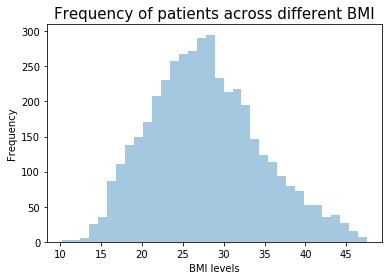

In [25]:
#One variable plot analysis

sns.distplot(stroke.bmi,kde=False).set_title("Frequency of patients across different BMI",fontsize=15)
plt.xlabel("BMI levels")
plt.ylabel("Frequency")
plt.show()

__1. Histogram of the <code>BMI</code> column__
* The distribution of above plot is normal with large number of patients having the BMI levels between 25-30 kg/m2.

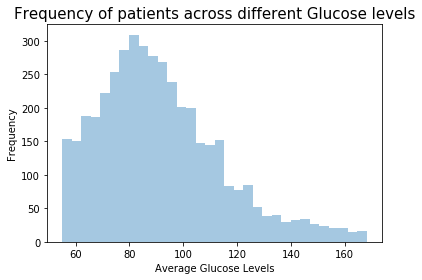

In [26]:
sns.distplot(stroke['avg_glucose_level'],kde=False).set_title("Frequency of patients across different Glucose levels",fontsize=15)
plt.xlabel("Average Glucose Levels")
plt.ylabel("Frequency")
plt.show()

__2. Histogram of the <code>Average Glucose Level</code> column__
* The distribution of plot is right skewed with maximum number of patients having the Average Glucose levels between 75-95 mg/dl

### <span style="color: #0099cc;">  Bivariate Visualization  <a class="anchor" id="14"></a>  

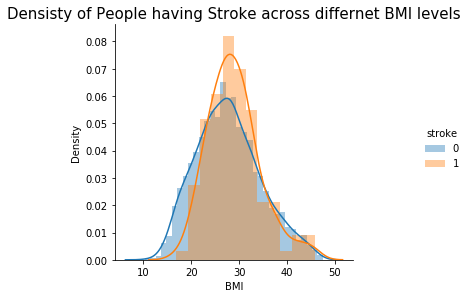

In [27]:
#Two varaible plot analysis 

#Visualizing the density of people having a stroke across different bmi levels 

sns.FacetGrid(stroke,hue='stroke',height=4)\
.map(sns.distplot,'bmi')\
.add_legend();
plt.title("Densisty of People having Stroke across differnet BMI levels",fontsize=15)
plt.ylabel("Density")
plt.xlabel("BMI")
plt.show()

__3. Density plot of <code>BMI</code> for <code>stroke</code>__
* The plot suggests that more than 70% of patients having BMI levels between 28-30 kg/m2 have chances of getting stroke and also more than 50% of patients having BMI levels from 22-27 kg/m2 have chances of not getting stroke.

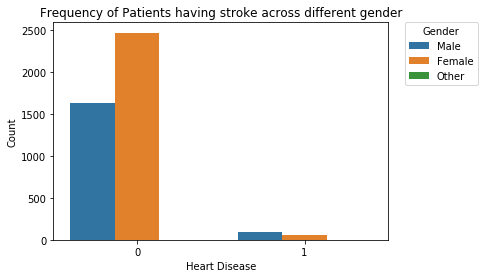

In [28]:
sns.countplot(x='heart_disease',data=stroke,hue='gender')
plt.title("Frequency of Patients having stroke across different gender")
plt.ylabel('Count')
plt.xlabel('Heart Disease')
plt.legend(title = "Gender")
# position the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.,title="Gender");
plt.show()

__4. Bar plot of <code>Gender</code> for <code>Heart Disease</code>__
* The plot suggests that count of Females not having heart disease is more than that of Males and also count of Males having heart disease is more than that of Females based on the dataset.

###  <span style="color: #0099cc;">  Trivariate Visualization   <a class="anchor" id="15"></a>

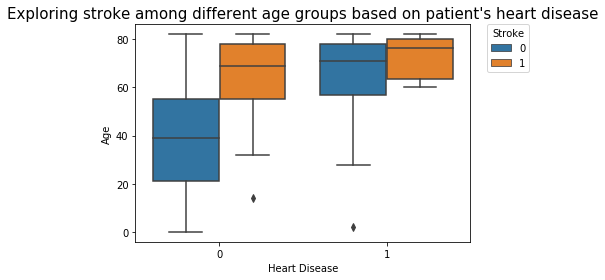

In [29]:
#Three variabe plot analysis 

#Visulaizing the stroke among patients across different age groups and based on heart disease

sns.boxplot(y="age",x="heart_disease",hue="stroke",data=stroke)
plt.title("Exploring stroke among different age groups based on patient's heart disease",fontsize=15)
plt.xlabel("Heart Disease")
plt.ylabel("Age")
# position the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.,title="Stroke");
plt.show()

__5. Box plot of <code>Age</code> by <code>Heart Disease</code> for <code>Stroke</code>__
* The plot suggests that more than 75% of patients without heart disease are more likely to have stroke between age group 75-85 and more than 50% of patients with heart disease are more likely to have stroke between age group 75-80  

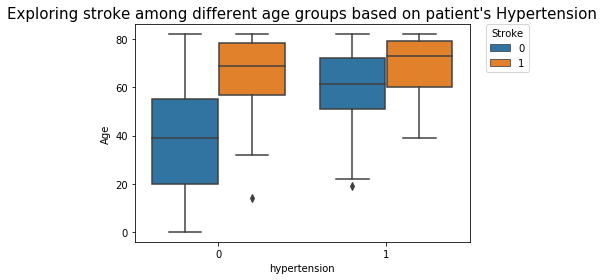

In [30]:
#Visulaizing the stroke among patients across different age groups and based on hypertension

sns.boxplot(y="age",x="hypertension",hue="stroke",data=stroke)
plt.title("Exploring stroke among different age groups based on patient's Hypertension",fontsize=15)
plt.xlabel("hypertension")
plt.ylabel("Age")
# position the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.,title="Stroke");
plt.show()

__6. Box plot of <code>Age</code> by <code>Hypertension</code> for <code>Stroke</code>__
* The plot suggests that more than 50% of patients without hypertension are more likely to have stroke between age group 70- 79 and more than 50% of patients with hypertension are more likely to have stroke between age group 70-75  

# <span style="color: #0099cc;"> Summary and Conclusions <a class="anchor" id="16"></a>  

* Dataset is now cleaned using preprocessing techniques and is ready for modelling .
* Males are more likely to have heart disease than Females
* Large number of patients have BMI levels between 25-30 kg/m2 and Average Glucose levels between 75-95 mg/dl
* Around 70% of patients having BMI levels between 28-30 kg/m2 have chances of getting stroke so its not clear since large  portion of patients have BMI levels between 25-30 kg/m2
* We cannot derive any significant relationship between age of patients and patients having heart disease and hypertension since patients having stroke and not having stroke fall into same age group. 
* Patients with Higher Age has more chances of getting a stroke.


# <span style="color: #0099cc;"> References <a class="anchor" id="17"></a> 

Jupyter Notebook Users Manual.ipynb
Jupyter Notebook Users Manual.ipynb. (2021). Retrieved 11 April 2021, from https://jupyter.brynmawr.edu/services/public/dblank/Jupyter%20Notebook%20Users%20Manual.ipynb


Seaborn | www.featureranking.com
Seaborn | www.featureranking.com. (2021). Retrieved 10 April 2021, from https://www.featureranking.com/tutorials/python-tutorials/seaborn/


notebook?, H. and Dancho, M.
notebook?, H., & Dancho, M. (2014). How can I add a table of contents to a Jupyter / JupyterLab notebook?. Retrieved 10 April 2021, from https://stackoverflow.com/questions/21151450/how-can-i-add-a-table-of-contents-to-a-jupyter-jupyterlab-notebook#:~:text=In%20the%20note
    
Predicting stroke along with EDA (90% accuracy)
Predicting stroke along with EDA (90% accuracy). (2021). Retrieved 11 April 2021, from https://www.kaggle.com/smriti19/predicting-stroke-along-with-eda-90-accuracy

In [32]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1


In [33]:
stroke.to_csv('Cleaned_Data.csv',index = False)